In [1]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import os,warnings,datetime

import tensorflow as tf
import pandas as pd
import seaborn as sns

from rtlsdr import *

from scipy.fftpack import fft

warnings.filterwarnings('ignore')
sns.set()

C:\Users\Jan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [84]:
if sdr.device_opened: sdr.close()
sdr = RtlSdr(device_index=1)

base_sample_rate = sdr.sample_rate

sdr.sample_rate = 3*base_sample_rate
sdr.bandwidth = 10e6
sdr.center_freq = 100e6    
sdr.freq_correction = 60

sdr.gain = 'auto'

In [96]:
samples = sdr.read_samples(256*1024)

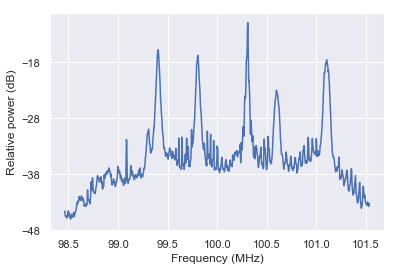

In [97]:
plt.psd(samples, NFFT=1024, Fs=sdr.sample_rate/1e6, Fc=sdr.center_freq/1e6)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Relative power (dB)')

plt.show()

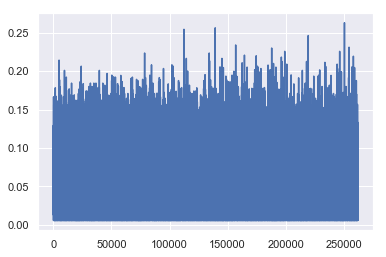

In [98]:
plt.plot(np.abs(samples))

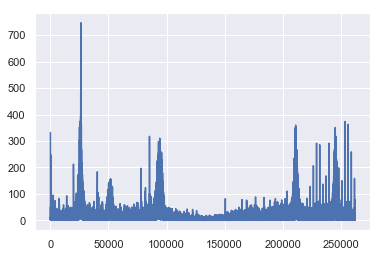

In [99]:
plt.plot(np.abs(fft(samples)))

In [ ]:
sdr.close()